In [1]:
import pandas as pd

data = pd.read_csv('Hotel Reservations.csv')

In [2]:
# Perform initial analysis including basic statistics
basic_statistics = data.describe(include='all')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

basic_statistics, missing_values


(       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
 count       36275  36275.000000    36275.000000          36275.000000   
 unique      36275           NaN             NaN                   NaN   
 top      INN00001           NaN             NaN                   NaN   
 freq            1           NaN             NaN                   NaN   
 mean          NaN      1.844962        0.105279              0.810724   
 std           NaN      0.518715        0.402648              0.870644   
 min           NaN      0.000000        0.000000              0.000000   
 25%           NaN      2.000000        0.000000              0.000000   
 50%           NaN      2.000000        0.000000              1.000000   
 75%           NaN      2.000000        0.000000              2.000000   
 max           NaN      4.000000       10.000000              7.000000   
 
         no_of_week_nights type_of_meal_plan  required_car_parking_space  \
 count        36275.000000        

In [3]:
description = data.describe(include='all')
description

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


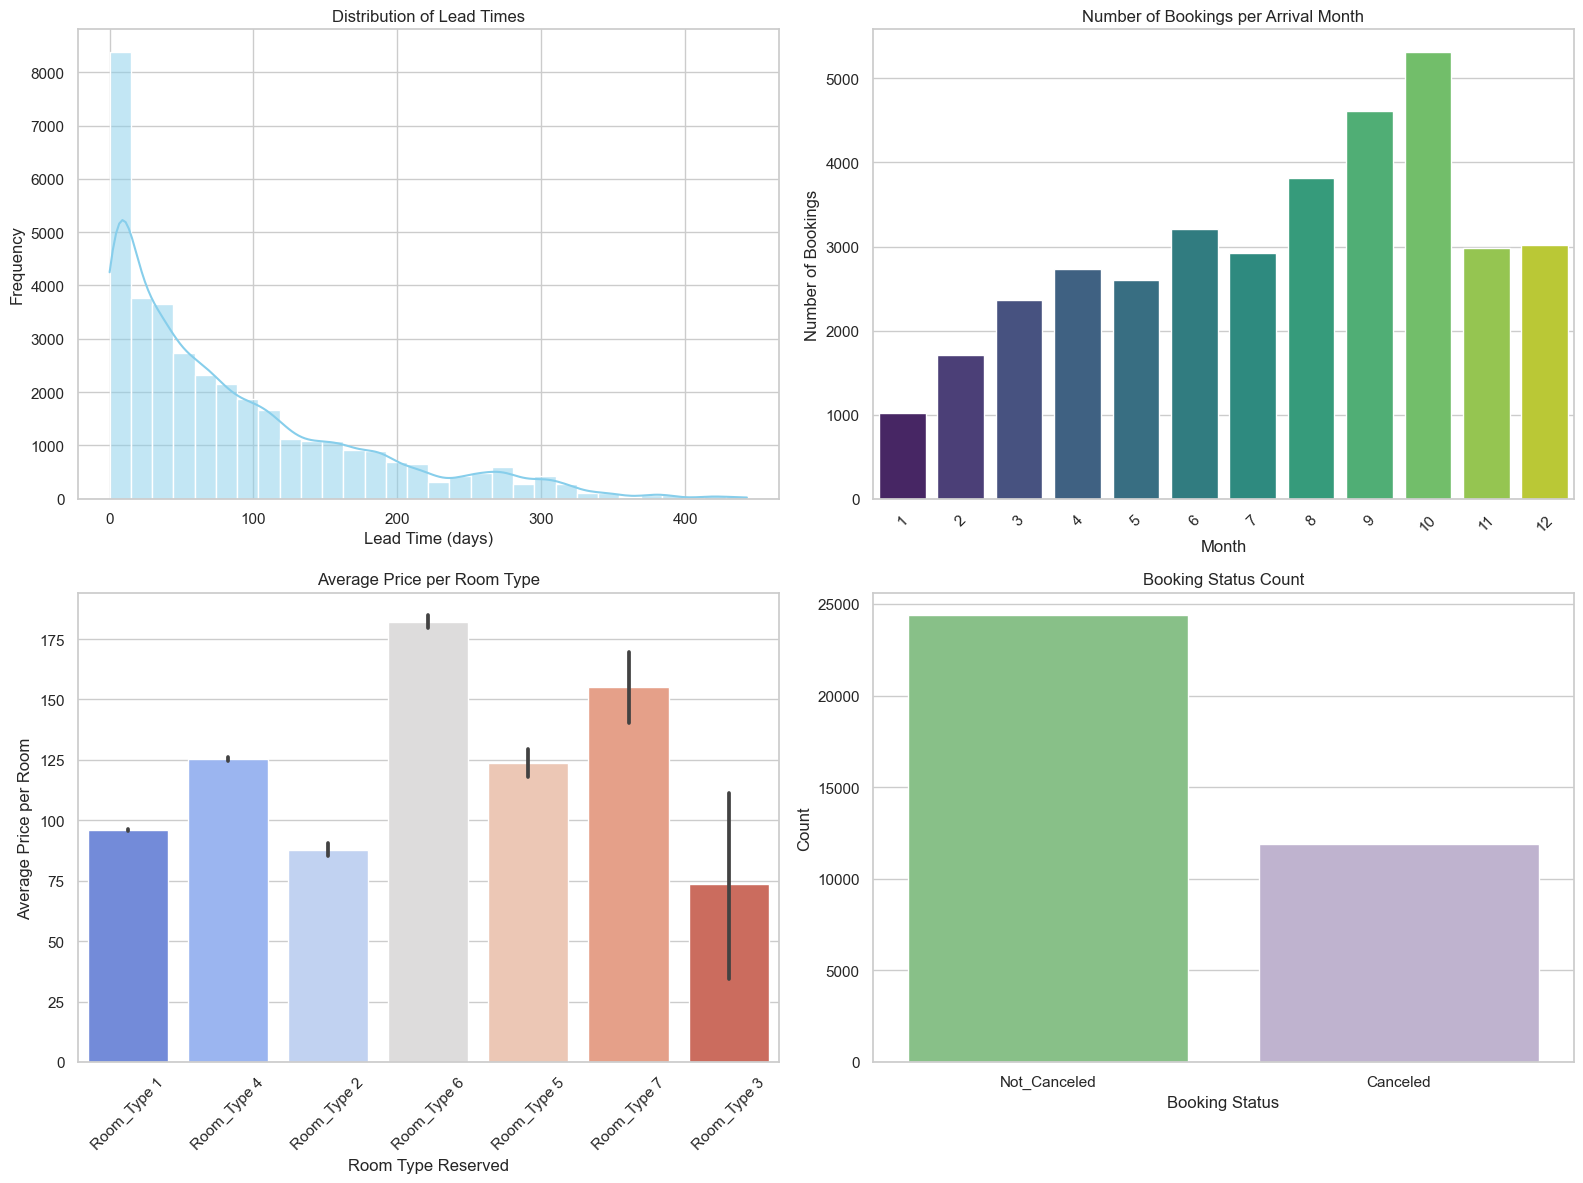

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of the plots
sns.set(style="whitegrid")

# Create a figure for subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of lead times
sns.histplot(data['lead_time'], bins=30, ax=ax[0, 0], kde=True, color='skyblue')
ax[0, 0].set_title('Distribution of Lead Times')
ax[0, 0].set_xlabel('Lead Time (days)')
ax[0, 0].set_ylabel('Frequency')

# Plot 2: Number of bookings per arrival month
sns.countplot(x='arrival_month', data=data, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Number of Bookings per Arrival Month')
ax[0, 1].set_xlabel('Month')
ax[0, 1].set_ylabel('Number of Bookings')
ax[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Average price per room type
sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=data, ax=ax[1, 0], palette='coolwarm')
ax[1, 0].set_title('Average Price per Room Type')
ax[1, 0].set_xlabel('Room Type Reserved')
ax[1, 0].set_ylabel('Average Price per Room')
ax[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Booking status count
sns.countplot(x='booking_status', data=data, ax=ax[1, 1], palette='Accent')
ax[1, 1].set_title('Booking Status Count')
ax[1, 1].set_xlabel('Booking Status')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [5]:
# Convert the 'booking_status' feature from categorical to numerical
# Assuming 'Canceled' is 0 and 'Not_Canceled' is 1

data['booking_status_numeric'] = data['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Display the first few rows to verify the conversion
data[['booking_status', 'booking_status_numeric']].head()


,booking_status,booking_status_numeric
0,Not_Canceled,0
1,Not_Canceled,0
2,Canceled,1
3,Canceled,1
4,Canceled,1


In [6]:
# Select features and target variable
X = data.drop(columns=['Booking_ID', 'booking_status', 'booking_status_numeric'])
y = data['booking_status_numeric']

## Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

In [8]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [9]:
# Preprocessing: OneHotEncoder for categorical data, StandardScaler for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# MLP Classifier model with backpropagation
mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Adjusted hidden_layer_sizes to include an additional layer
    ('classifier', MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
                                 activation='relu',                # Activation function for the hidden layers
                                 solver='sgd',                   # Solver for weight optimization (backpropagation)
                                 learning_rate_init=0.0001,         # Initial learning rate (for SGD or Adam)
                                 max_iter=300,                     # Maximum number of iterations (epochs)
                                 random_state=42))
])

In [12]:
# Train the MLP model
mlp.fit(X_train, y_train)

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                               learning_rate_init=0.0001, max_iter=300,
                               random_state=42, solver='sgd'))])

In [13]:
# Predict and evaluate the model
mlp_predictions = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print(f'Accuracy: {mlp_accuracy:.2f}')

Accuracy: 0.83


### Grid Search CV for Multilayer Perceptron

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'classifier__hidden_layer_sizes': [(128, 64, 32), (128, 64), (64, 32)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__learning_rate_init': [0.001, 0.0001],
    'classifier__alpha': [0.0001, 0.001],  # L2 penalty (regularization term) parameter
}

In [15]:
# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# After fitting GridSearchCV
cv_results = grid_search.cv_results_

# Number of parameter combinations
n_combinations = len(cv_results['params'])

# Loop through all combinations
for i in range(n_combinations):
    params = cv_results['params'][i]
    mean_test_score = cv_results['mean_test_score'][i]
    print(f"Parameters: {params}, Mean CV Accuracy: {mean_test_score:.2f}")


# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64, 32), 'classifier__learning_rate_init': 0.001, 'classifier__solver': 'adam'}, Mean CV Accuracy: 0.85
Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64, 32), 'classifier__learning_rate_init': 0.001, 'classifier__solver': 'sgd'}, Mean CV Accuracy: 0.86
Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64, 32), 'classifier__learning_rate_init': 0.0001, 'classifier__solver': 'adam'}, Mean CV Accuracy: 0.86
Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64, 32), 'classifier__learning_rate_init': 0.0001, 'classifier__solver': 'sgd'}, Mean CV Accuracy: 0.82
Parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (128, 64),

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
best_params_mlp = grid_search.best_params_
best_params_mlp

{'classifier__activation': 'tanh',
 'classifier__alpha': 0.001,
 'classifier__hidden_layer_sizes': (128, 64),
 'classifier__learning_rate_init': 0.001,
 'classifier__solver': 'adam'}

In [17]:
# Evaluate the best model found by GridSearchCV on the test set
best_mlp_model = grid_search.best_estimator_
predictions = best_mlp_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test set accuracy: {test_accuracy:.2f}')

Test set accuracy: 0.87


In [41]:
# Train set accuracy
predictions = best_mlp_model.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions)
print(f'Train set accuracy: {test_accuracy:.2f}')

Train set accuracy: 0.97


## Support Vector Machine

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd


# Create a pipeline that transforms features and trains the model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
svm_pipeline.fit(X_train, y_train)

# Predict and evaluate
svm_predictions = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f'Accuracy: {svm_accuracy}')

Accuracy: 0.8034458993797381


### Grid Search CV for Support Vector Machine

In [20]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf'],  # Kernel type
    'classifier__gamma': ['scale', 'auto']  # Kernel coefficient (not used with 'linear' kernel)
}


In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5,
                           scoring='accuracy',  # or another appropriate scoring metric
                           n_jobs=-1,  # Use all available cores
                           verbose=2)  # Higher number gives more verbose output


In [22]:
# Assuming X_train and y_train are your features and target variable
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64, 32), classifier__learning_rate_init=0.001, classifier__solver=sgd; total time=  41.2s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64, 32), classifier__learning_rate_init=0.0001, classifier__solver=adam; total time=  46.4s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.001, classifier__solver=adam; total time=  39.9s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.0001, classifier__solver=adam; total time=  41.8s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.0001, classifier__solver=sgd; total tim

[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64, 32), classifier__learning_rate_init=0.001, classifier__solver=sgd; total time=  41.5s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64, 32), classifier__learning_rate_init=0.0001, classifier__solver=adam; total time=  46.7s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.001, classifier__solver=adam; total time=  42.4s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.0001, classifier__solver=adam; total time=  42.2s
[CV] END classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(128, 64), classifier__learning_rate_init=0.0001, classifier__solver=sgd; total time=  43.6s
[CV] END classifier__activation=relu, classifier__a

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_b...
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object'))])),
                                       ('classifier',
                                        SVC(kernel='linear',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [23]:
print("Best parameters found:", grid_search.best_params_)
best_model_svm = grid_search.best_estimator_


Best parameters found: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [24]:
from sklearn.metrics import accuracy_score

predictions = best_model_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test set accuracy: {test_accuracy:.2f}')


Test set accuracy: 0.87


In [36]:
# Train dataset accuracy

predictions = best_model_svm.predict(X_train)
test_accuracy = accuracy_score(y_train, predictions)
print(f'Train set accuracy: {test_accuracy:.2f}')

Train set accuracy: 0.90


In [25]:
from sklearn.pipeline import make_pipeline

# Create a pipeline that transforms features and trains the model
best_svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=100, gamma='scale', random_state=42))
])

# Train the model
best_svm_model.fit(X_train, y_train)

# Make predictions on the test set
best_svm_predictions = best_svm_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, best_svm_predictions)
print(f'Test set accuracy: {test_accuracy:.2f}')

Test set accuracy: 0.87


In [40]:
from sklearn.model_selection import cross_validate

# Perform cross-validation with additional metrics and return training scores
cv_results = cross_validate(best_svm_model, X, y, cv=5,
                            scoring=['accuracy', 'f1_macro'],  # Example of multiple metrics
                            return_train_score=True,
                            n_jobs=-1)

# Access and print the results
print("Train accuracy scores:", cv_results['train_accuracy'])
print("Test accuracy scores:", cv_results['test_accuracy'])
print("Train F1 macro scores:", cv_results['train_f1_macro'])
print("Test F1 macro scores:", cv_results['test_f1_macro'])

Train accuracy scores: [0.89541695 0.8984838  0.89882839 0.8980703  0.89769125]
Test accuracy scores: [0.87222605 0.86643694 0.86064783 0.869745   0.86299104]
Train F1 macro scores: [0.87897277 0.88235198 0.88289651 0.88222636 0.88151399]
Test F1 macro scores: [0.85279282 0.84580186 0.83855126 0.84894794 0.84013935]


In [28]:
from sklearn.model_selection import cross_val_score


# Perform cross-validation
cv_scores = cross_val_score(best_svm_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")
print(f"Standard deviation of CV accuracy: {cv_scores.std():.2f}")


Cross-validation accuracy scores: [0.87222605 0.86643694 0.86064783 0.869745   0.86299104]
Mean CV accuracy: 0.87
Standard deviation of CV accuracy: 0.00


## Results

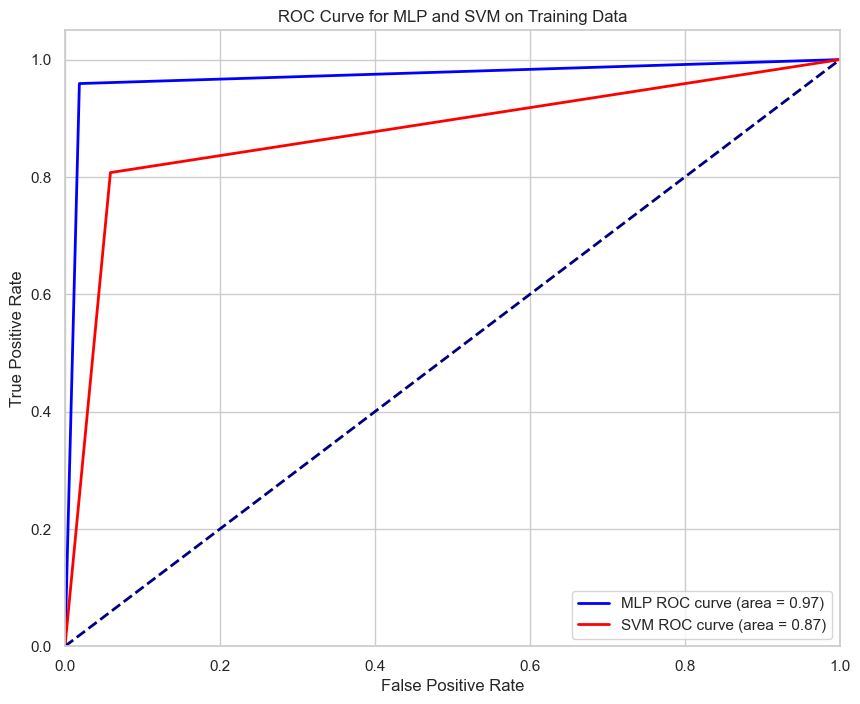

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class for both models
y_scores_mlp = best_mlp_model.predict(X_train)  # MLP probabilities
y_scores_svm = best_svm_model.predict(X_train)     # SVM decision function scores

# Compute ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_train, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_train, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for both models
plt.figure(figsize=(10, 8))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP and SVM on Training Data')
plt.legend(loc="lower right")
plt.show()


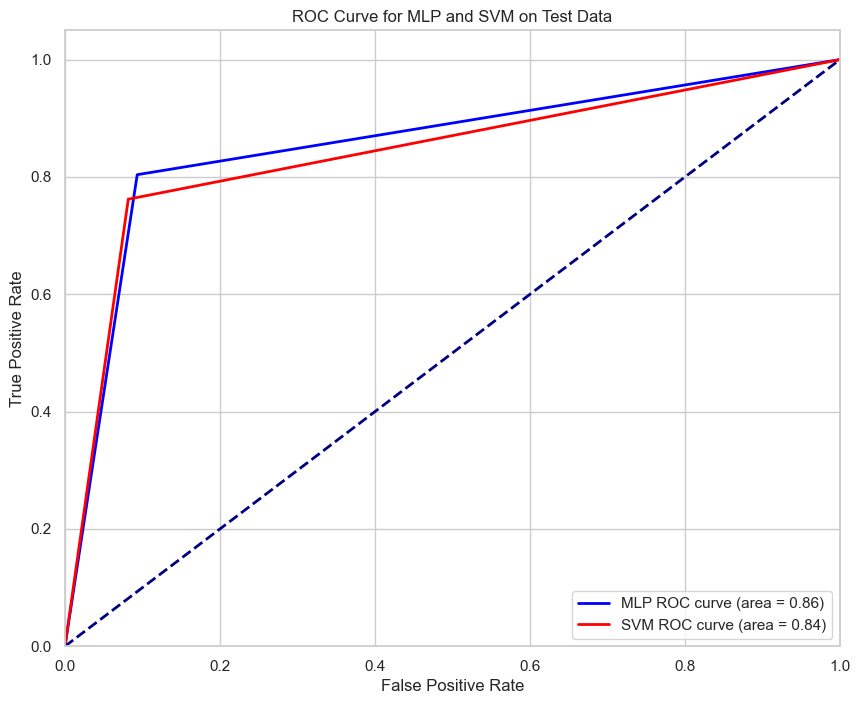

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Predict probabilities for the positive class for both models
y_scores_mlp = best_mlp_model.predict(X_test)
y_scores_svm = best_svm_model.predict(X_test) 

# Compute ROC curve and AUC for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_scores_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for both models
plt.figure(figsize=(10, 8))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP and SVM on Test Data')
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices
cm_mlp = confusion_matrix(y_test, mlp_predictions)
cm_svm = confusion_matrix(y_test, best_svm_predictions)


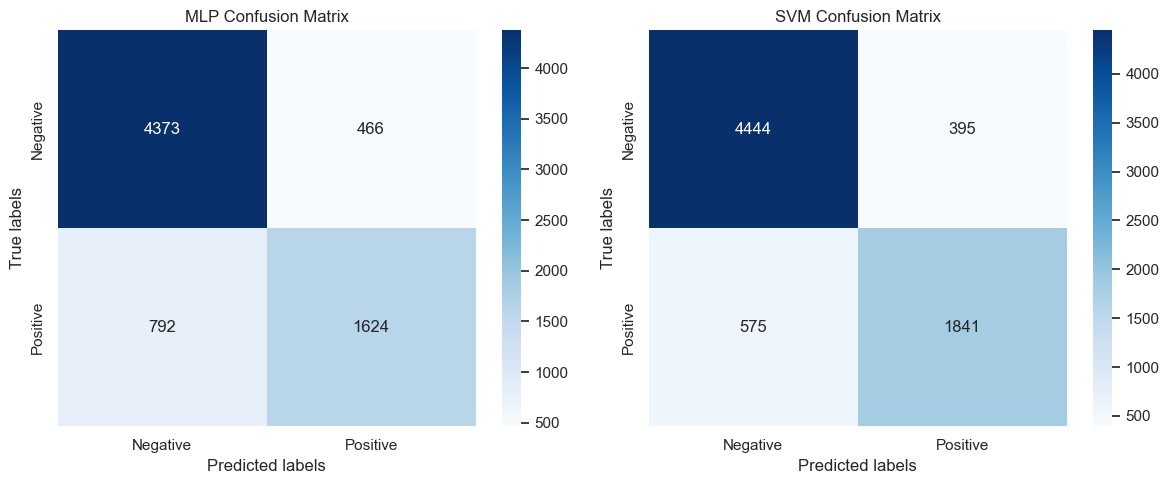

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MLP Confusion Matrix
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('MLP Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Negative', 'Positive'])
ax[0].yaxis.set_ticklabels(['Negative', 'Positive'])

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].xaxis.set_ticklabels(['Negative', 'Positive'])
ax[1].yaxis.set_ticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()


## Saving our Test data and both the best trained NECO models

In [110]:
# We will create a DataFrame with test features and labels
test_data = pd.DataFrame(X_test)
test_data['True_Label'] = y_test  # Add the true labels as a new column in the DataFrame

# Save the DataFrame to a CSV file
test_data.to_csv('test_data.csv', index=False)  # Set index=False not to save the index


In [81]:
test_data['True_Label']

NameError: name 'test_data' is not defined

In [120]:
from joblib import dump

# Save the models to a file
dump(best_mlp_model, 'mlp_model.joblib')
dump(best_svm_model, 'svm_model.joblib')

['svm_model.joblib']